In [5]:
from utils.SST_utils import get_historical_ssts, get_cmip_historical



cmip_historical = get_cmip_historical()
cmip_historical = cmip_historical.sel(time=(cmip_historical.time.dt.year >= 1980)) # no point hoarding old data
cmip_historical

<xarray.DataArray 'tos_mean_mean' (time: 420, lat: 192, lon: 288)>
[23224320 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -89.53 -88.59 -87.66 -86.72 ... 87.66 88.59 89.53
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

## historical run??

In [6]:
historical_ssts = get_historical_ssts()

In [9]:
cmip_tropical_mean = cmip_historical.sel(lat=slice(-20,20)).mean(dim=['lat', 'lon']).rolling(time=12).mean(dim='time').dropna(dim='time')
historical_tropical_mean = historical_ssts['sst'].sel(lat=slice(-20,20)).mean().values

future_tropical_mean_anomaly = cmip_tropical_mean - historical_tropical_mean
tropical_anomaly_df = future_tropical_mean_anomaly.to_dataframe().reset_index()
tropical_anomaly_df



/var/folders/nk/f4_nbwvd0_vgzc0m31k7tc6m0000gn/T/ipykernel_20504/3676835078.py:1: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  cmip_tropical_mean = cmip_historical.sel(lat=slice(-20,20)).mean(dim=['lat', 'lon']).rolling(time=12).mean(dim='time').dropna(dim='time')


,time,tos_mean_mean
0,1980-12-16 12:00:00,0.062014
1,1981-01-16 12:00:00,0.061094
2,1981-02-16 12:00:00,0.062571
3,1981-03-16 12:00:00,0.064867
4,1981-04-16 12:00:00,0.065981
...,...,...
404,2014-08-16 12:00:00,0.526056
405,2014-09-16 12:00:00,0.527159
406,2014-10-16 12:00:00,0.528414
407,2014-11-16 12:00:00,0.528955


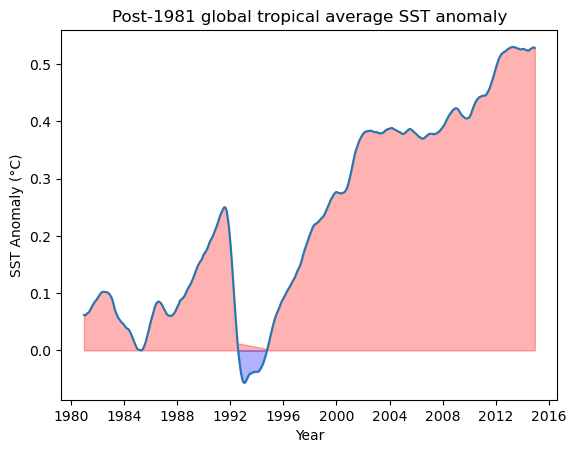

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_anomaly(df, x_name, y_name, title, x_label, y_label):
    ax = sns.lineplot(data = df,y=y_name, x=x_name)
    line_obj = ax.lines[0]
    x1 = line_obj.get_xydata()[:,0]
    y1 = line_obj.get_xydata()[:,1]

    x1_pos = x1[y1 > 0]
    y1_pos = y1[y1 > 0]

    x1_neg = x1[y1 < 0]
    y1_neg = y1[y1 < 0]

    ax.fill_between(x1_pos,y1_pos, color="red", alpha=0.3)
    ax.fill_between(x1_neg,y1_neg, color="blue", alpha=0.3)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    plt.show()
    fig = ax.get_figure()
    fig.savefig('./media/SST/anomaly/cmip_tropical_sst_anomaly.png')

plot_anomaly(
    tropical_anomaly_df, 
    y_name='tos_mean_mean', 
    x_name='time', 
    title='Post-1981 global tropical average SST anomaly', 
    x_label='Year', 
    y_label='SST Anomaly (°C)')

In [ ]:
# TODO: EXAMINE THE NAN's that appear here

cmip_deltas = cmip_historical - cmip_historical.mean('time')
cmip_deltas


<xarray.DataArray 'tos_mean_mean' (time: 420, lat: 192, lon: 288)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.0947386 , -0.09424448, -0.09276986, ..., -0.09458983,
         -0.09467638, -0.09471273],
        [-0.09548163, -0.09345043, -0.08885837, ..., -0.09489655,
         -0.09503686, -0.09514904],
        [-0.08702922, -0.09004426, -0.09291363, ..., -0.08311391,
         -0.08315575, -0.08419883]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
...
        [-0.00428092, -0.00430727, -0.0038048 , ..., -0.0040952 ,
         -0.0041517 , -0.00420558],
        [-0.00372422, -0.00381482, -0.0035162 , ..., -0.0037744 ,
         -0.00378489, -0.00377905],
        [ 0.00150013,  0.00181592,  0.00215185, ...,  0.00087225,
          0.00087845,  0.00121927]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.0544008 , -0.055233  , -0.05558622, ..., -0.05398083,
         -0.05421913, -0.05431485],
        [-0.04355299, -0.04956663, -0.05318642, ..., -0.04293334,
         -0.04314327, -0.04329014],
        [-0.03813457, -0.04383445, -0.0493784 , ..., -0.03253102,
         -0.03252196, -0.03287375]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -89.53 -88.59 -87.66 -86.72 ... 87.66 88.59 89.53
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

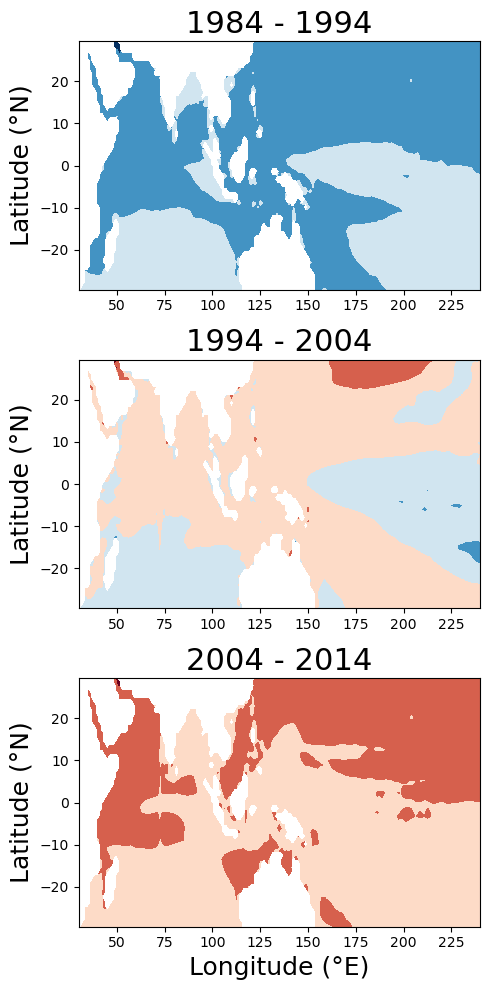

In [ ]:
decade_start = 1984
end = 2014


MIN_LAT = -30
MAX_LAT = 30

MIN_LONG = 30
MAX_LONG = 240

NUM_DATAPOINTS_IN_YEAR = 12
cmip_deltas = cmip_deltas.sel(lon = slice(MIN_LONG, MAX_LONG), lat=slice(MIN_LAT, MAX_LAT))


fig, axs = plt.subplots(nrows= 3, ncols= 1, figsize=(5,10))
row_num = 0

while decade_start < 2014:
    ax = axs[row_num]
    decade_deltas = cmip_deltas.sel(
        time= (cmip_deltas.time.dt.year >= decade_start) 
        & (cmip_deltas.time.dt.year < decade_start + 10))
    
    decade_delta_mean = decade_deltas.mean('time')

    ASPECT_RATIO =(MAX_LONG - MIN_LONG)/(MAX_LAT-MIN_LAT)

    # fig, axes = plt.subplots(figsize=(ASPECT_RATIO*FIG_HEIGHT, FIG_HEIGHT))
    mld = decade_delta_mean.plot.contourf(ax=ax, add_colorbar=False)

    ax.set_title(f"{str(decade_start)} - {str(decade_start + 10)}", fontsize= 22)
    
    
    ax.set_ylabel('Latitude (°N)', fontsize= 18)
    
    if row_num == len(axs) - 1 :
        ax.set_xlabel('Longitude (°E)', fontsize= 18)
    else:
        ax.set_xlabel('')
    
    # fig.suptitle(f"{str(decade_start)} - {str(decade_start + 10)} Mean SST", fontsize= 22)

    decade_start += 10    
    row_num += 1


fig.tight_layout()
# cbar = fig.colorbar(mld, ax=axs[-1], shrink=0.4)

fig.savefig(f'./media/SST/decade_avgs/cmip_decade_avgs.png')

In [ ]:
# difference between the two
import xarray as xr

# ALIGNMENT CODE
# cmip_aligned, real_aligned  = xr.align(cmip_historical, historical_ssts, join="outer")
# cmip_aligned = cmip_aligned.interpolate_na(dim='lat').interpolate_na(dim='lon')
# cmip_aligned, historical_ssts = xr.align(cmip_aligned, historical_ssts, join='right')
# cmip_aligned.to_netcdf('../SST_data/CMIP/CMIP_historical_aligned.nc')
import numpy as np
import pandas as pd

def go_to_first_day(dt64):
    pandas_dt = pd.to_datetime(dt64)
    if pandas_dt.day != 1:
        new_day = pandas_dt + pd.Timedelta(1, 'd')
        return new_day.normalize()
        
    return pandas_dt.normalize()


cmip_aligned = xr.open_dataset('../SST_data/CMIP/CMIP_historical_aligned.nc', engine='netcdf4')
cmip_aligned = cmip_aligned.assign_coords(time = np.vectorize(lambda x: go_to_first_day(x))(cmip_aligned.time))
cmip_aligned['tos_mean_mean']


<xarray.DataArray 'tos_mean_mean' (time: 499, lat: 720, lon: 1440)>
[517363200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-03-01
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9

In [ ]:
historical_ssts['sst']

<xarray.DataArray 'sst' (time: 499, lat: 720, lon: 1440)>
[517363200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-03-01
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Attributes:
    long_name:      Monthly Mean of Sea Surface Temperature
    units:          degC
    valid_range:    [-3. 45.]
    precision:      2.0
    dataset:        NOAA High-resolution Blended Analysis
    var_desc:       Sea Surface Temperature
    level_desc:     Surface
    statistic:      Monthly Mean
    parent_stat:    Individual Observations
    actual_range:   [-1.8  32.14]
    standard_name:  sea_surface_temperature

In [ ]:
diff = cmip_aligned['tos_mean_mean'] - historical_ssts['sst']
diff

<xarray.DataArray (time: 499, lat: 720, lon: 1440)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-03-01
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9

/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/User

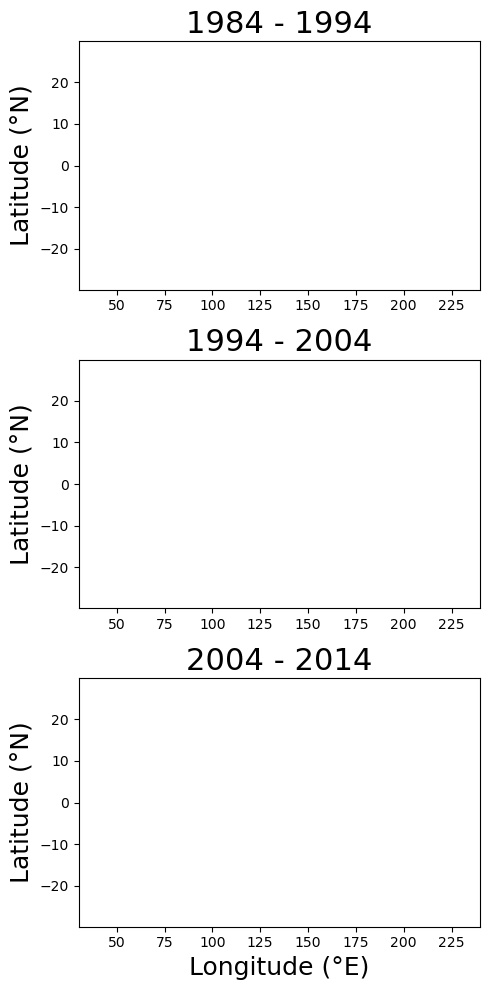

In [ ]:
decade_start = 1984
end = 2014


MIN_LAT = -30
MAX_LAT = 30

MIN_LONG = 30
MAX_LONG = 240

NUM_DATAPOINTS_IN_YEAR = 12
diff = diff.sel(lon = slice(MIN_LONG, MAX_LONG), lat=slice(MIN_LAT, MAX_LAT))


fig, axs = plt.subplots(nrows= 3, ncols= 1, figsize=(5,10))
row_num = 0

while decade_start < 2014:
    ax = axs[row_num]
    decade_diff = diff.sel(
        time= (diff.time.dt.year >= decade_start) 
        & (diff.time.dt.year < decade_start + 10))
    
    decade_diff_mean = decade_diff.mean('time')

    ASPECT_RATIO =(MAX_LONG - MIN_LONG)/(MAX_LAT-MIN_LAT)

    # fig, axes = plt.subplots(figsize=(ASPECT_RATIO*FIG_HEIGHT, FIG_HEIGHT))
    mld = decade_diff_mean.plot.contourf(ax=ax, add_colorbar=False)

    ax.set_title(f"{str(decade_start)} - {str(decade_start + 10)}", fontsize= 22)
    
    
    ax.set_ylabel('Latitude (°N)', fontsize= 18)
    
    if row_num == len(axs) - 1 :
        ax.set_xlabel('Longitude (°E)', fontsize= 18)
    else:
        ax.set_xlabel('')
    
    # fig.suptitle(f"{str(decade_start)} - {str(decade_start + 10)} Mean SST", fontsize= 22)

    decade_start += 10    
    row_num += 1


fig.tight_layout()
# cbar = fig.colorbar(mld, ax=axs[-1], shrink=0.4)

fig.savefig(f'./media/SST/decade_avgs/cmip_historical_diff.png')